## Data Loading

In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
# from wordcloud import WordCloud
import pandas as pd
import plotly.figure_factory as ff
# from src.model import apriori
import numpy as np

import plotly.plotly as py 

In [2]:
import sys
project_path = "/home/ashmi/Amazon-Mining"
# make sure to use position 1
sys.path.insert(1, project_path)

In [3]:
from src.data.json_loader import JSONLoader

In [4]:
# file_path corresponds to the file of the .gz file which contains the JSON file. 
file_path = '/home/ashmi/Desktop/Amazondata/meta_Electronics.json.gz'
loader = JSONLoader()

## Exploration

In [5]:
data = loader.load_data(file_path)

In [6]:
data.head()

,description,title,categories,imUrl,asin,salesRank,price,related,brand
0,The Kelby Training DVD Mastering Blend Modes i...,Kelby Training DVD: Mastering Blend Modes in A...,"[[Electronics, Computers & Accessories, Cables...",http://ecx.images-amazon.com/images/I/31JIPhp%...,0132793040,NaN,NaN,NaN,NaN
1,NaN,Kelby Training DVD: Adobe Photoshop CS5 Crash ...,"[[Electronics, Computers & Accessories, Cables...",http://ecx.images-amazon.com/images/I/31uogm6Y...,0321732944,NaN,NaN,NaN,NaN
2,Digital Organizer and Messenger,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",http://ecx.images-amazon.com/images/I/51k0qa8f...,0439886341,{'Electronics': 144944},8.15,"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,The CLIKR-5 UR5U-8780L remote control is desig...,CLIKR-5 Time Warner Cable Remote Control UR5U-...,"[[Electronics, Accessories & Supplies, Audio &...",http://ecx.images-amazon.com/images/I/41HaAhbv...,0511189877,NaN,23.36,"{'buy_after_viewing': ['B001KC08A4', 'B00KUL8O...",NaN
4,"Like its award-winning predecessor, the Intell...",Rand McNally 528881469 7-inch Intelliroute TND...,"[[Electronics, GPS & Navigation, Vehicle GPS, ...",http://ecx.images-amazon.com/images/I/51FnRkJq...,0528881469,NaN,299.99,"{'buy_after_viewing': ['B006ZOI9OY', 'B00C7FKT...",NaN


In [7]:
data.tail()


,description,title,categories,imUrl,asin,salesRank,price,related,brand
498191,Vehicle suction cup mount (replacement) NOTICE...,Suction Cup Mount,"[[Electronics, GPS & Navigation, GPS System Ac...",http://ecx.images-amazon.com/images/I/313e6SJm...,BT008V9J9U,NaN,21.99,{'buy_after_viewing': ['B000EPFCC2']},Garmin
498192,Quatech - 1 Port PCMCIA to DB-25 Parallel Adap...,Parallel PCMCIA Card 1PORT Epp,"[[Electronics, Computers & Accessories, Cables...",http://ecx.images-amazon.com/images/I/31oF9oNv...,BT008SXQ4C,NaN,23.99,"{'buy_after_viewing': ['B000SR2H4W', 'B001Q7X0...",NaN
498193,C2G - 5m Ultma USB 2.0 A Mini B Cble,C2G / Cables to Go 5M Ultima USB 2.0 Cable,"[[Electronics, Computers & Accessories, Cables...",http://ecx.images-amazon.com/images/I/21WIrX5f...,BT008G3W52,NaN,18.91,"{'buy_after_viewing': ['B007NLW3C2', 'B0002J2E...",C2G
498194,Keyboard drawer.,Underdesk Keyboard Drawer,"[[Electronics, Computers & Accessories, Cables...",http://ecx.images-amazon.com/images/I/41TNAVmf...,BT008UKTMW,NaN,25.54,"{'also_viewed': ['B0002LD0ZY', 'B0002LCZP0', '...",Fellowes
498195,Garmin USB to R232 Converter CableUSB to RS232...,USB To R232 Converter Cable,"[[Electronics, Computers & Accessories, Cables...",http://ecx.images-amazon.com/images/I/41x-15rR...,BT008T2BGK,NaN,62.31,"{'buy_after_viewing': ['B0007T27H8', 'B00425S1...",Garmin


In [8]:
data.shape

(498196, 9)

In [9]:
data.describe()

,price
count,389693.000000
mean,61.406786
std,119.118870
min,0.010000
25%,9.950000
50%,19.990000
75%,51.950000
max,999.990000


In [10]:
dtypes = data.dtypes
print(dtypes)

description     object
title           object
categories      object
imUrl           object
asin            object
salesRank       object
price          float64
related         object
brand           object
dtype: object


In [11]:
dtypes_df = pd.DataFrame({'feature':dtypes.index, 'type':dtypes.values})
print(dtypes_df)

       feature     type
0  description   object
1        title   object
2   categories   object
3        imUrl   object
4         asin   object
5    salesRank   object
6        price  float64
7      related   object
8        brand   object


In [12]:
print(data['price'])

0            NaN
1            NaN
2           8.15
3          23.36
4         299.99
5          13.95
6          32.10
7          78.83
8          15.55
9            NaN
10         15.99
11         12.95
12           NaN
13         11.50
14           NaN
15         49.95
16          9.95
17           NaN
18          1.93
19          0.94
20         19.65
21           NaN
22          0.02
23         22.50
24        127.99
25          4.99
26          6.99
27           NaN
28          9.99
29        111.60
           ...  
498166     17.99
498167     33.99
498168       NaN
498169       NaN
498170     44.95
498171     99.00
498172       NaN
498173     78.99
498174    599.99
498175    169.90
498176       NaN
498177       NaN
498178       NaN
498179       NaN
498180       NaN
498181       NaN
498182    429.00
498183     33.95
498184       NaN
498185     79.95
498186    466.99
498187    417.98
498188     39.99
498189    199.99
498190    130.00
498191     21.99
498192     23.99
498193     18.

In [13]:
print(type(data['price'][0]))
print(len(data))

<class 'numpy.float64'>
498196


In [14]:
print(type(data['brand'][0]))

<class 'float'>


## Calculating the percentage of NaN in Price

In [15]:
import math
count = 0
for i in range(0,len(data)):
    x = float(data['price'][i])
    if (math.isnan(x)):
        count = count + 1
total = len(data)
print("Number of NaN=",count)
percent = (count/total)*100
print("Percentage of NaN= ",percent )


Number of NaN= 108503
Percentage of NaN=  21.779179278838047


## Calculating the number of NaN in each column

In [16]:
nans = data.isnull().sum()

nans_df = pd.DataFrame({'feature':nans.index, 'Number of NaNs':nans.values})

nans_df = nans_df[nans_df.columns[::-1]]

print(nans_df)


    

       feature  Number of NaNs
0  description           38726
1        title            7002
2   categories               0
3        imUrl             175
4         asin               0
5    salesRank          369490
6        price          108503
7      related          131237
8        brand          355664


## Cleaning the data ( removing the NaN in Price)

In [17]:
data = data[np.isfinite(data['price'])]

print(len(data))

389693


# Visualizations

## Plotting the price distribution as a boxplot

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[   8.15   23.36  299.99 ...,   18.91   25.54   62.31]


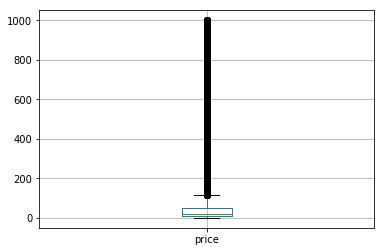

In [18]:
x = (data['price'])
print(type(x))
x = x.values
print(type(x))
print(x)
data.boxplot(column='price')
# plt.boxplot(x)
plt.figure()
plt.show()



<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[   8.15   23.36  299.99 ...,   18.91   25.54   62.31]


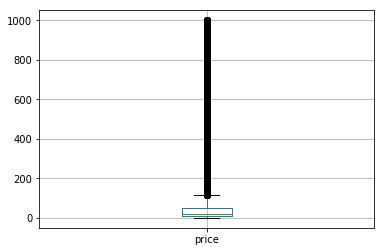

In [19]:
x = (data['price'])
print(type(x))
x = x.values
print(type(x))
print(x)
data.boxplot(column='price')

fig = plt.plot()
plt.savefig('prices_boxplot_plot.png')
plt.show()

In [20]:
print(max(data['price']))
print(min(data['price']))

999.99
0.01


### Assigning bins/'grade' to each product depending on price range

In [21]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
group_names = ['1', '2', '3', '4', '5', '6' '7', '8', '9', '10']
data['grade'] = pd.cut(data['price'], bins)
print(data['grade'])



2           (0, 100]
3           (0, 100]
4         (200, 300]
5           (0, 100]
6           (0, 100]
7           (0, 100]
8           (0, 100]
10          (0, 100]
11          (0, 100]
13          (0, 100]
15          (0, 100]
16          (0, 100]
18          (0, 100]
19          (0, 100]
20          (0, 100]
22          (0, 100]
23          (0, 100]
24        (100, 200]
25          (0, 100]
26          (0, 100]
28          (0, 100]
29        (100, 200]
30          (0, 100]
35          (0, 100]
37          (0, 100]
38          (0, 100]
41          (0, 100]
42          (0, 100]
43          (0, 100]
44          (0, 100]
             ...    
498015      (0, 100]
498151      (0, 100]
498153      (0, 100]
498156      (0, 100]
498158      (0, 100]
498159      (0, 100]
498161    (100, 200]
498163      (0, 100]
498164      (0, 100]
498165    (100, 200]
498166      (0, 100]
498167      (0, 100]
498170      (0, 100]
498171      (0, 100]
498173      (0, 100]
498174    (500, 600]
498175    (10

### Plotting the cumulative price as histogram

In [22]:
data['price'].hist()

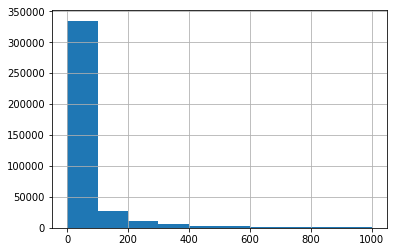

In [23]:
plt.show()

### Plotting the price (range) for products as bar chart

In [24]:
grade_count = data['grade'].value_counts()
print(grade_count)
print(type(grade_count))

(0, 100]       334785
(100, 200]      27578
(200, 300]      10544
(300, 400]       5913
(400, 500]       3475
(500, 600]       2421
(600, 700]       1886
(700, 800]       1317
(800, 900]        949
(900, 1000]       825
Name: grade, dtype: int64
<class 'pandas.core.series.Series'>


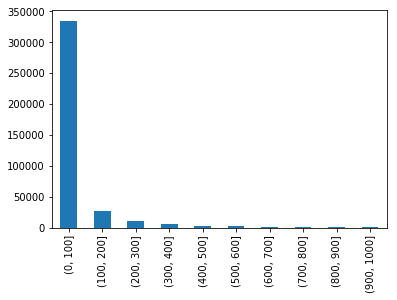

In [25]:
grade_count.plot('bar')
plt.show()

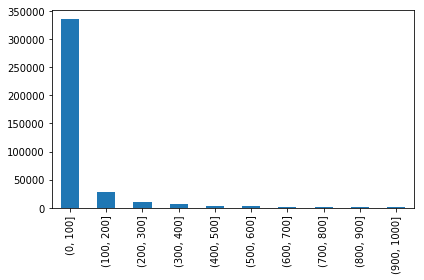

In [26]:
grade_count.plot('bar')
fig = plt.plot()
plt.tight_layout()
plt.savefig('prices_bar_plot.png')
plt.show()


In [27]:
grade_count = data.grade.count()
print(grade_count)
print(type(grade_count))

389693
<class 'numpy.int64'>


In [28]:
data['grade'].value_counts

<bound method IndexOpsMixin.value_counts of 2           (0, 100]
3           (0, 100]
4         (200, 300]
5           (0, 100]
6           (0, 100]
7           (0, 100]
8           (0, 100]
10          (0, 100]
11          (0, 100]
13          (0, 100]
15          (0, 100]
16          (0, 100]
18          (0, 100]
19          (0, 100]
20          (0, 100]
22          (0, 100]
23          (0, 100]
24        (100, 200]
25          (0, 100]
26          (0, 100]
28          (0, 100]
29        (100, 200]
30          (0, 100]
35          (0, 100]
37          (0, 100]
38          (0, 100]
41          (0, 100]
42          (0, 100]
43          (0, 100]
44          (0, 100]
             ...    
498015      (0, 100]
498151      (0, 100]
498153      (0, 100]
498156      (0, 100]
498158      (0, 100]
498159      (0, 100]
498161    (100, 200]
498163      (0, 100]
498164      (0, 100]
498165    (100, 200]
498166      (0, 100]
498167      (0, 100]
498170      (0, 100]
498171      (0, 100]
498173     

## Feature Analysis: Brand

In [29]:
brand_categories = data['brand'].value_counts()

In [30]:
print(type(brand_categories))
print(len(brand_categories))
print(brand_categories)

<class 'pandas.core.series.Series'>
9960
Unknown                     3401
HP                          2110
Sony                        2063
Neewer                      2005
Generic                     1864
Monoprice                   1560
Dell                        1481
eForCity                    1318
SIB                         1197
StarTech                    1188
                            1160
Samsung                     1106
Toshiba                     1096
SIB-CORP                    1093
BELKIN                      1075
C2G                          936
Pyle                         870
Panasonic                    794
Metra                        790
Kingston                     778
Tripp Lite                   763
eForCity&amp;reg;            714
Asus                         702
Philips                      697
Canon                        696
Acer                         695
Nikon                        682
SanDisk                      663
Lenovo                       645
Sc

### finding out the top 10 brands ( excluding unknown)

In [31]:
print(brand_categories[:11])

Unknown      3401
HP           2110
Sony         2063
Neewer       2005
Generic      1864
Monoprice    1560
Dell         1481
eForCity     1318
SIB          1197
StarTech     1188
             1160
Name: brand, dtype: int64


In [32]:
print(type(brand_categories))

<class 'pandas.core.series.Series'>


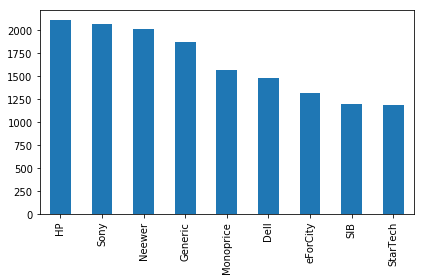

In [34]:
brand_categories[1:10].plot(kind="bar")
fig = plt.plot()
plt.tight_layout()
plt.savefig('brands_plot.png')
plt.show()